In [52]:
#from src.serializer.order import get_factory_list_from_order_data_frame
import pandas as pd
import datetime

df_orders = pd.read_csv("../data/order_large.csv", encoding="cp1252")

df_orders['Weight_kg'] = df_orders['Weight'] / 100000

#df_orders['Available_Time'] = df_orders['Available_Time'].astype('str')
df_orders['Available_Time'] = pd.to_datetime(
    df_orders['Available_Time'],
    format='%d/%m/%y %H:%M',
    errors='coerce'
)
df_orders['Available_Date'] = df_orders['Available_Time'].dt.date

df_orders['Deadline'] = pd.to_datetime(
    df_orders['Deadline'],
    format='%d/%m/%y %H:%M',  # note double space and dot separators
    errors='coerce'
)
df_orders['Deadline_Date'] = df_orders['Deadline'].dt.date

In [56]:
# sum of df_orders['Weight_kg']
total_weight = df_orders['Weight_kg'].sum()

total_vehicles_capacity = 10000+ 5000+ 2000

total_trips_needed = total_weight / total_vehicles_capacity
print(f"Total weight: {total_weight} kg")
print(f"Total trips needed: {total_trips_needed}")

# total trip per vehicle
trips_per_vehicle = total_trips_needed / 3
print(f"Total trips per vehicle: {trips_per_vehicle}")


Total weight: 520695.18000000005 kg
Total trips needed: 30.62912823529412
Total trips per vehicle: 10.209709411764708


<Axes: title={'center': 'Total Weight over Deadline Date'}, xlabel='Deadline_Date'>

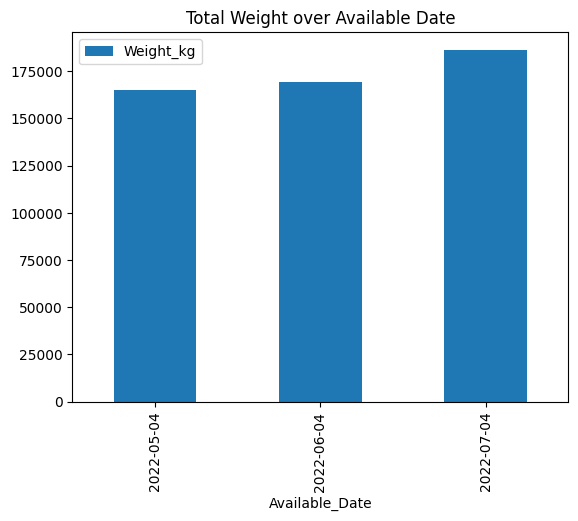

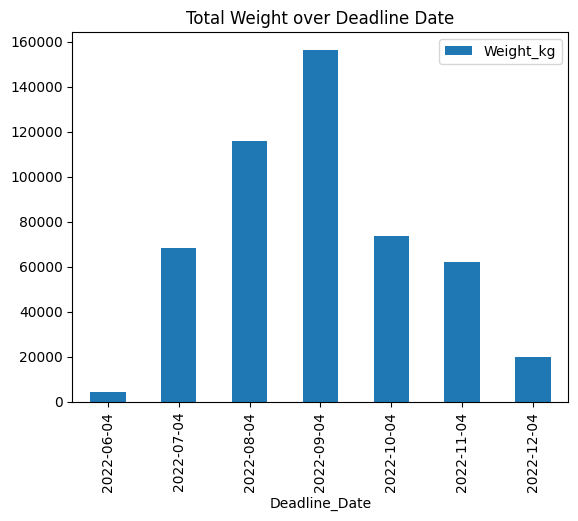

In [53]:
# group by Avaialable_Date, sum of weight and volume
df_grouped_availale_date = df_orders.groupby(["Available_Date"]).agg(
    {"Weight_kg": "sum", "Area": "sum", 'Item_ID': 'count'}
).reset_index()

# deadline date
df_grouped_deadline_date = df_orders.groupby(["Deadline_Date"]).agg(
    {"Weight_kg": "sum", "Area": "sum", 'Item_ID': 'count'}
).reset_index()

# plot df_grouped_availale_date over avaialable date
df_grouped_availale_date.plot(x='Available_Date', y='Weight_kg', kind='bar', title='Total Weight over Available Date')
df_grouped_deadline_date.plot(x='Deadline_Date', y='Weight_kg', kind='bar', title='Total Weight over Deadline Date')

In [26]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4635 entries, 0 to 4634
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_ID        4635 non-null   object 
 1   Material_ID     4635 non-null   object 
 2   Item_ID         4635 non-null   object 
 3   Source          4635 non-null   object 
 4   Destination     4635 non-null   object 
 5   Available_Time  4635 non-null   object 
 6   Deadline        4635 non-null   object 
 7   Danger_Type     4635 non-null   object 
 8   Area            4635 non-null   int64  
 9   Weight          4635 non-null   int64  
 10  Delivery_Notes  677 non-null    object 
 11  Weight_kg       4635 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 434.7+ KB


In [28]:
# group by Order_ID, source and destination, sum the weight, and volume
df_grouped = df_orders.groupby(["Destination"]).agg(
    {"Weight_kg": "sum", "Area": "sum", 'Item_ID': 'count'}
).reset_index()
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Destination  61 non-null     object 
 1   Weight_kg    61 non-null     float64
 2   Area         61 non-null     int64  
 3   Item_ID      61 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 2.0+ KB


In [29]:
df_grouped[df_grouped['Weight_kg'] > 10000]

,Destination,Weight_kg,Area,Item_ID
4,City_12,13313.20,2437520,93
5,City_13,39758.40,6135822,198
8,City_16,18070.50,4578525,105
9,City_17,15984.00,2073600,216
11,City_19,17171.00,2247480,94
17,City_24,27883.10,1907475,177
19,City_26,17237.98,3360590,173
21,City_28,15407.66,3815455,89
23,City_3,10424.25,1918080,105
29,City_35,30925.68,4641860,243
